In [43]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import random

In [44]:
def point_generate(pt1, pt2, pt3):
    """
    Generating random points
    """
    s, t = sorted([random.random(), random.random()])
    return (s * pt1[0] + (t-s)*pt2[0] + (1-t)*pt3[0],
            s * pt1[1] + (t-s)*pt2[1] + (1-t)*pt3[1])

pt1 = (0, 0)
pt2 = (0, 800)
pt3 = (800, 0)
pt4 = (1000, 1000)
pt5 = (0, 1000)
pt6 = (1000,0)

points = [point_generate(pt1, pt2, pt3) for _ in range(1000)]

# x1, y1 is the  dataset with +1s
x1, y1 = zip(*points)

points2 = [point_generate(pt4, pt5, pt6) for _ in range(1000)]

# x2, y2 is the  dataset with -1s
x2, y2 = zip(*points2)

xn = x1 + x2
yn = y1 + y2

X = np.column_stack((xn, yn))

# Mark +1 for first 1000 dataset 
ya = [1 for i in range(1000)]

# Mark -1 for next 1000 dataset
yb = [-1 for i in range(1000)]
Y = ya + yb


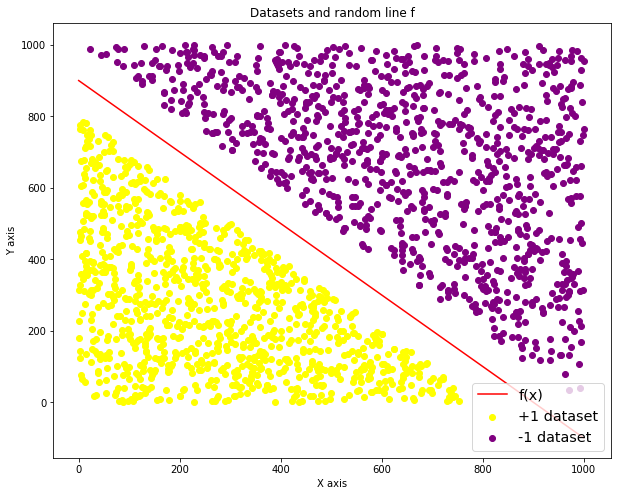

In [45]:
plt.scatter(x1 , y1, c='yellow', label="+1 dataset")
plt.scatter(x2 , y2, c='purple', label="-1 dataset")
'''
choosing a random line in the plane as the target function f,
where one side of the line maps to +1 and the other maps to −1
'''
m = -1
c = 900
f = lambda x: m*x + c
x = np.linspace(0,1000)

plt.rcParams["figure.figsize"] = (15,10)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Datasets and random line f')
plt.plot(x, f(x), 'r', label = 'f(x)')
plt.legend(fontsize='x-large')


In [46]:
# Function to calculate the number of errors
# This is a helper function for pocket algorithm
def get_errors(w):
    
    intercept = -w[0]/w[2];
    new_slope = -w[1]/w[2];
    g = lambda x: new_slope * x + intercept;
    count = 0
    for i in range(2000):
        if(g(X[i,0])>X[i,1]) and Y[i] != 1:
            count += 1
        if(g(X[i,0])<X[i,1]) and Y[i] != -1:
            count += 1
            
    return count
   
# PLA implementation

def perceptron(X,Y,maxiter=10000,w=[0,0.1,0.1]):
    
    #Initial weights for Pocket algorithm
    w_pocket = [0, 0.1, 0.1]
    
    N = X.shape[0];
    
    # Separating curve
    f = lambda x: np.sign(w[0]+w[1]*x[0]+w[2]*x[1]);

    count = 0
    for _ in range(maxiter):
        i = np.random.randint(N);
        if(Y[i] != f(X[i,:])):
            count += 1
            w[0] = w[0] + Y[i]
            w[1] = w[1] + Y[i]*X[i,0]
            w[2] = w[2] + Y[i]*X[i,1]
            
            error = get_errors(w)
            pocket_error = get_errors(w_pocket)
            if error < pocket_error:
                w_pocket = w[:]
    print ("Updates= ", count)
    print ('w=',w)
    print ('w_pocket=',w_pocket)
    return w, w_pocket;

Updates=  70141
w= [28911, -36.093445567209415, -29.563525299007626]
w_pocket= [28911, -36.093445567209415, -29.563525299007626]


'\nAnswering the question 5(a)\nHere is the number of updates that the algorithm takes before converging.\nWhen I ran this algorithm, the number of updates it took is 51960\nThe red line is the f(x) and green line is the final hypothesis g(x).\nYes, f is close to g. The line g is the result obtained by running PLA.\n\n'

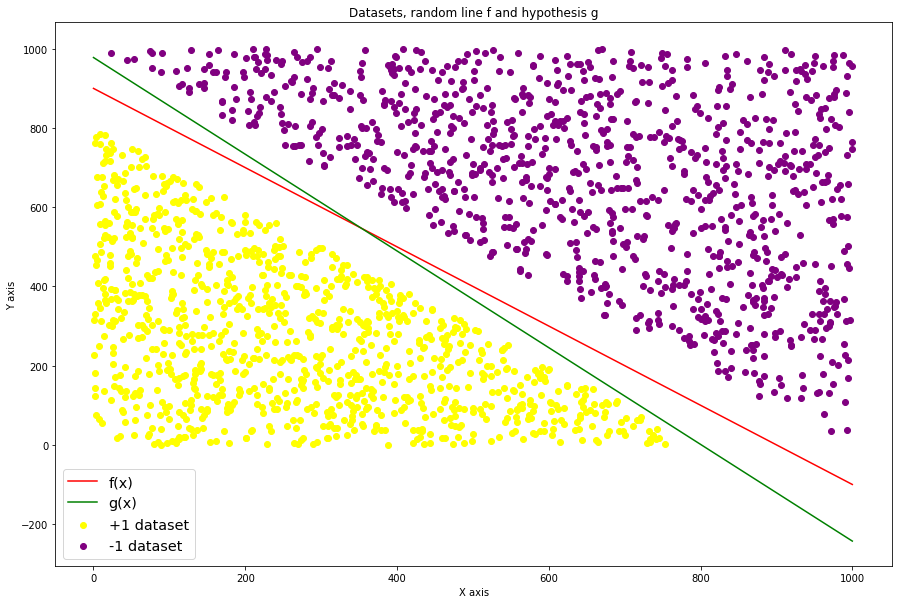

In [47]:

w, w_pocket = perceptron(X, Y, maxiter=150000)

intercept = -w[0]/w[2];
new_slope = -w[1]/w[2];
g = lambda x: new_slope * x + intercept;

pocket_intercept = -w_pocket[0]/w_pocket[2];
pocket_slope = -w_pocket[1]/w_pocket[2];
h = lambda x: pocket_slope * x + pocket_intercept;

plt.scatter(x1 , y1, c='yellow', label="+1 dataset")
plt.scatter(x2 , y2, c='purple', label="-1 dataset")

plt.plot(x,f(x),'red', label="f(x)")
plt.plot(x,g(x),'green',label="g(x)")
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Datasets, random line f and hypothesis g')
plt.legend(fontsize='x-large')
plt.rcParams["figure.figsize"] = (15,10)

'''
Answering the question 5(a)
Here is the number of updates that the algorithm takes before converging.
When I ran this algorithm, the number of updates it took is 70141
The red line is the f(x) and green line is the final hypothesis g(x).
Yes, f is close to g. The line g is the result obtained by running PLA.

'''


In [48]:
'''adding some noise to the data set generated by
randomly selecting 50 examples from each class and
assigning them wrong output
'''
for i in range(950, 1000):
    Y[i] = -1
    Y[i+1000] = 1
    

Updates=  46281
w= [45186, -490.2614110224841, 384.8577735631437]
w_pocket= [44002, -45.40621223569076, -49.42166356700449]


'\nAnswer to the question 5(b) \nThe green line g is the plot of the PLA run with added noise.\nDue to the presence of noise there is a deviation of the line g to update \nfor the current samples of data.\n'

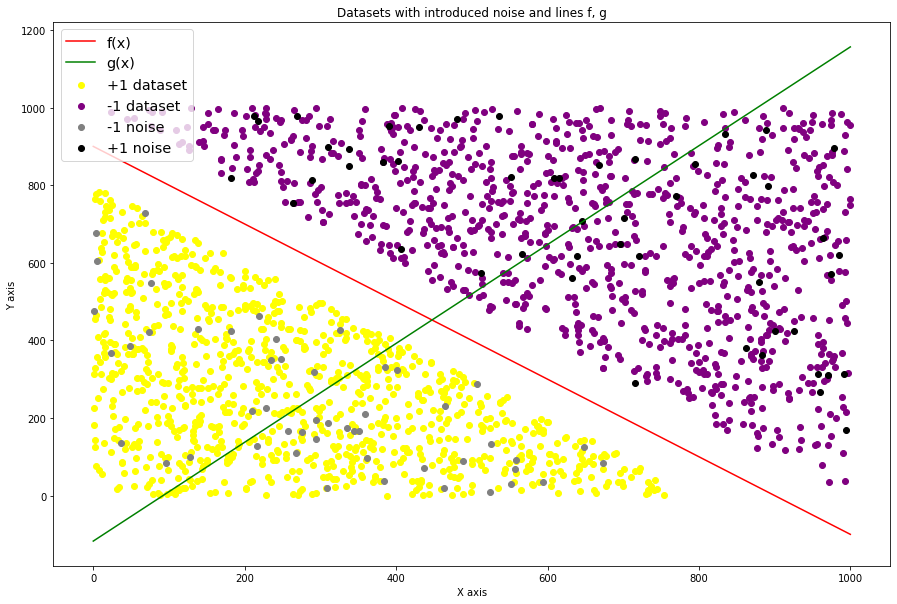

In [49]:
w, w_pocket = perceptron(X, Y, maxiter=100000)

intercept = -w[0]/w[2];
new_slope = -w[1]/w[2];
g = lambda x: new_slope * x + intercept;

# h represents function for line from pocket algorithm
pocket_intercept = -w_pocket[0]/w_pocket[2];
pocket_slope = -w_pocket[1]/w_pocket[2];
h = lambda x: pocket_slope * x + pocket_intercept;

plt.scatter(x1[:950] , y1[:950], c='yellow', label="+1 dataset")
plt.scatter(x2[:950] , y2[:950], c='purple', label="-1 dataset")

#noise data is represented in grey and black colors
plt.scatter(x1[950:] , y1[950:], c='grey', label="-1 noise")
plt.scatter(x2[950:] , y2[950:], c='black', label="+1 noise")

plt.plot(x,f(x),'red', label='f(x)')
plt.plot(x,g(x),'green', label='g(x)')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.rcParams["figure.figsize"] = (10,8)
plt.legend(fontsize='x-large')
plt.title('Datasets with introduced noise and lines f, g')

'''
Answer to the question 5(b) 
The green line g is the plot of the PLA run with added noise.
Due to the presence of noise there is a deviation of the line g to update 
for the current samples of data.
'''

'\nAswer to the question 5(c)\nThe black line(h) is the line obtained from the pocket algorithm.\nThough there is an introduced noise in this data-set, pocket algorithm preserves the\nbest values of weights,w to update the nearly accurate hypothesis.\nWe can clearly observe that the black line(h) obtained from pocket algorithm seperates\nthe data better than the green line (g) obtained from PLA.\n'

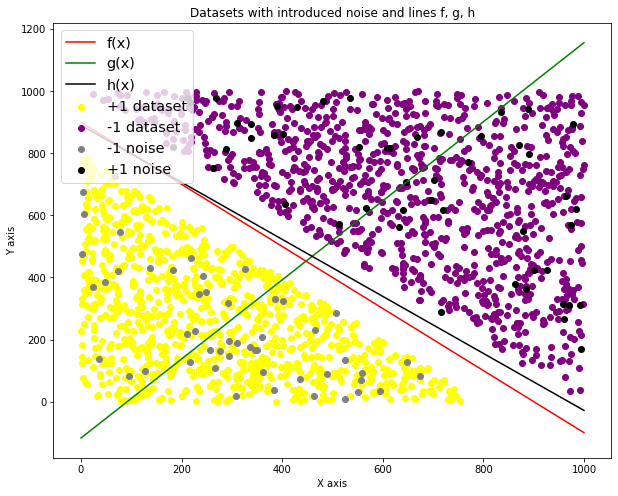

In [50]:

plt.scatter(x1[:950] , y1[:950], c='yellow', label="+1 dataset")
plt.scatter(x2[:950] , y2[:950], c='purple', label="-1 dataset")
#noise data is represented in grey and black colors

plt.scatter(x1[950:] , y1[950:], c='grey', label="-1 noise")
plt.scatter(x2[950:] , y2[950:], c='black', label="+1 noise")
plt.plot(x,f(x),'red', label='f(x)')
plt.plot(x,g(x),'green', label='g(x)')
plt.plot(x,h(x),'black', label='h(x)')
plt.rcParams["figure.figsize"] = (10,8)
plt.legend(fontsize='x-large')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Datasets with introduced noise and lines f, g, h')

'''
Aswer to the question 5(c)
The black line(h) is the line obtained from the pocket algorithm.
Though there is an introduced noise in this data-set, pocket algorithm preserves the
best values of weights,w to update the nearly accurate hypothesis.
We can clearly observe that the black line(h) obtained from pocket algorithm seperates
the data better than the green line (g) obtained from PLA.
'''

In [51]:
'''
references: https://github.com/buptjz/LearningFromData/blob/master/perceptron.py
https://github.com/kgourgou/Linear-Perceptron/blob/master/Perceptron-Algorithm.ipynb
'''

'\nreferences: https://github.com/buptjz/LearningFromData/blob/master/perceptron.py\nhttps://github.com/kgourgou/Linear-Perceptron/blob/master/Perceptron-Algorithm.ipynb\n'